In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

#### Data Reading

In [49]:
bus = pd.read_excel('bus.xlsx')
people = pd.read_excel('people.xlsx')
park = pd.read_excel('seoulpark.xlsx')
subway = pd.read_excel('seoul_subway.xlsx')

#### data preprocessing

In [50]:
park_location = park[['위도','경도']]
bus_location = bus[['위도','경도']]
people_location = people[['위도','경도','유동인구']]
subway_location = subway[['위도','경도']]

#### None to Zero

In [51]:
bus_location = bus_location.fillna(0)
park_location = park_location.fillna(0)
people_location = people_location.fillna(0)
subway_location = subway_location.fillna(0)

#### preprocessing 2    (location seoul area )

In [52]:
park_fin =park_location[(park_location['위도']>0) &(park_location['경도']>0) &(park_location['위도']<38) &(park_location['경도']<128)]
peo_fin =people_location[(people_location['위도']>0) &(people_location['경도']>0) &(people_location['위도']<38) &(people_location['경도']<128)]
bus_fin =bus_location[(bus_location['위도']>0) &(bus_location['경도']>0) &(bus_location['위도']<38) &(bus_location['경도']<128)]
sub_fin =subway_location[(subway_location['위도']>0) &(subway_location['경도']>0) &(subway_location['위도']<38) &(subway_location['경도']<128)]

#### classification bus, subway, park

In [53]:
park_fin['class']=0
peo_fin['class']=1
bus_fin['class']=2
sub_fin['class']=3

C:\Users\dongy\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\dongy\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\dongy\Anaconda3.1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://p

In [28]:
final = park_fin.append(peo_fin)
final = final.append(bus_fin)
final = final.append(sub_fin)

C:\Users\dongy\Anaconda3.1\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [55]:
a = []
for i in range(len(final)):
    a.append(i+1)

final['index'] = a

In [56]:
final_please_last = final.set_index(final['index'])

In [57]:
neigh = NearestNeighbors(n_neighbors=150)
neigh.fit(final_please_last[['위도','경도']].values)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=150, p=2, radius=1.0)

In [60]:
## 주차장한개의 위치에 주변 150개 클러스터 했을때 총 유동인구 수와   버스 정류장 과 지하철 역 개수 
## a = 주차장    b = 유동인구   c = 버스정류장 개수  d = 지하철역 개수
num_station = []
my_score = []

for i in final_please_last[final_please_last['class'] == 0].index:
    df = final_please_last.iloc[neigh.kneighbors([final_please_last[['위도','경도']].values[i-1]])[1].tolist()[0]]
    a = len(df[df['class']==0])
    b = df[df['class']==1]['유동인구'].sum()
    c = len(df[df['class']==2])
    d = len(df[df['class']==3])
    df2 = final_please_last[final_please_last['class'] == 0]  ## 주차장 위도 경도 위치 확인 하려궁..
    eerr = df2[['위도','경도']].values                        ## 가져와써  근데.. 아웃 바운드래.. 여기까지만 해봤음
    score = b - (b*c*0.01)-(b*d*0.02)
    dics = {tuple(eerr[i-1]) : score}
    my_score.append(dics)

In [62]:
for i in range(1, len(my_score)): # 리스트의 크기만큼 반복
    for j in range(i, 0, -1): # j 인덱스의 값이 줄어드면서 삽입할 위치를 찾을 때까지 반복
        if list(my_score[j].values())[0] > list(my_score[j-1].values())[0]: # 현재 인덱스가 앞의 원소보다 작다면
            my_score[j], my_score[j-1] = my_score[j-1], my_score[j] # swap해서 값 뒤로 밀어내기
        else : break

In [98]:
## 주차장한개의 위치에 주변 150개 클러스터 했을때 총 유동인구 수와   버스 정류장 과 지하철 역 개수 
## a = 주차장    b = 유동인구   c = 버스정류장 개수  d = 지하철역 개수
num_station = []
my_score2 = []

for i in final_please_last[final_please_last['class'] == 0].index:
    df = final_please_last.iloc[neigh.kneighbors([final_please_last[['위도','경도']].values[i-1]])[1].tolist()[0]]
    a = len(df[df['class']==0])
    b = df[df['class']==1]['유동인구'].sum()
    c = len(df[df['class']==2])
    d = len(df[df['class']==3])
    if d >= 2:
        score = b - 800000 * c - 30000*d
    else:
        score = b - 5000*c - 30000*d
    df2 = final_please_last[final_please_last['class'] == 0]  ## 주차장 위도 경도 위치 확인 하려궁..
    eerr = df2[['위도','경도']].values                        ## 가져와써  근데.. 아웃 바운드래.. 여기까지만 해봤음
#    score = b - (b*c*0.0000001)-(b*d*0.02)
    #score = b - 50000*c - 30000*d
    dics = {tuple(eerr[i-1]) : score}
    my_score2.append(dics)

In [99]:
for i in range(1, len(my_score2)): # 리스트의 크기만큼 반복
    for j in range(i, 0, -1): # j 인덱스의 값이 줄어드면서 삽입할 위치를 찾을 때까지 반복
        if list(my_score2[j].values())[0] > list(my_score2[j-1].values())[0]: # 현재 인덱스가 앞의 원소보다 작다면
            my_score2[j], my_score2[j-1] = my_score2[j-1], my_score2[j] # swap해서 값 뒤로 밀어내기
        else : break

In [40]:
for i in range(1, len(my_score)): # 리스트의 크기만큼 반복
    for j in range(i, 0, -1): # j 인덱스의 값이 줄어드면서 삽입할 위치를 찾을 때까지 반복
        if list(my_score[j].values())[0] > list(my_score[j-1].values())[0]: # 현재 인덱스가 앞의 원소보다 작다면
            my_score[j], my_score[j-1] = my_score[j-1], my_score[j] # swap해서 값 뒤로 밀어내기
        else : break

In [54]:
df = final_please_last.iloc[neigh.kneighbors([final_please_last[['위도','경도']].values[0]])[1].tolist()[0]]

In [90]:
df2 = final_please_last[final_please_last['class'] == 0]
eerr1 = df2[['위도','경도']]

In [145]:
##조교님꺼  아래꺼

In [ ]:
num_station = []
for i in final_please_last[final_please_last['class'] == 0].index:
    num_station.append(final_please_last.iloc[neigh.kneighbors([final_please_last[['위도','경도']].values[i-1]])[1].tolist()[0]]['class'].values.sum())

#### visualization 

(126.8, 127)

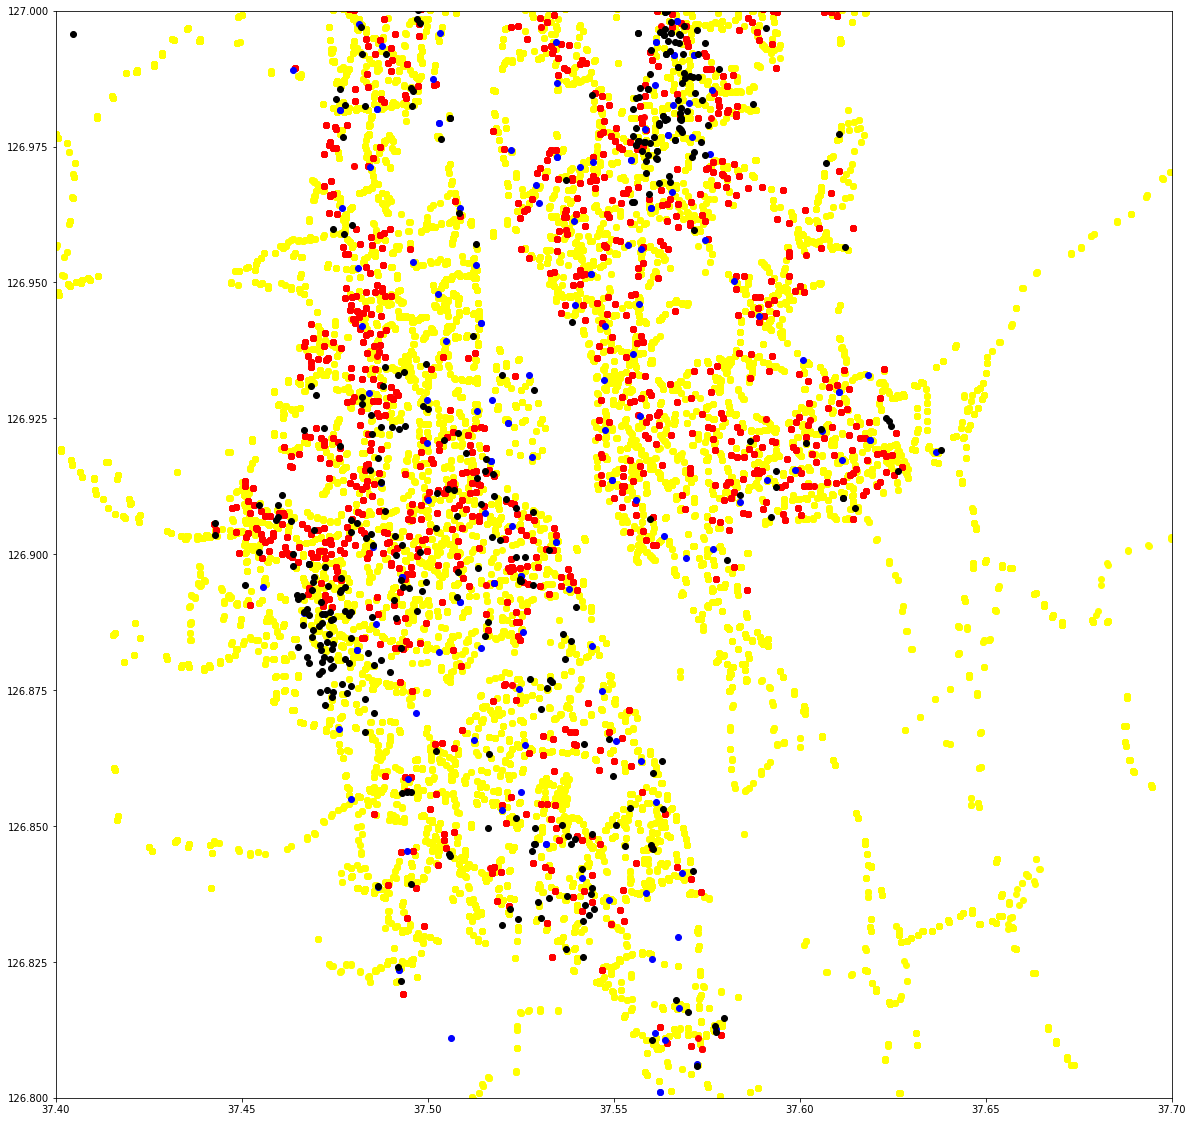

In [103]:
plt.figure(figsize=(20,20))
plt.scatter(bus_fin['위도'],bus_fin['경도'],color='yellow')
plt.scatter(peo_fin['위도'],peo_fin['경도'],color='red')
plt.scatter(sub_fin['위도'],sub_fin['경도'],color='blue')
plt.scatter(park_fin['위도'],park_fin['경도'],color='black')
plt.xlim(37.4,37.7)
plt.ylim(126.8,127)